# Projet Net'Elec


### Informations sur la base

### Ressources :
Lien vers la définition des champs : <a href="https://assets.rte-france.com/prod/public/2020-07/%C3%A9CO2mix%20-%20Description%20des%20fichiers%20des%20donn%C3%A9es%20en%20puissance.pdf" target="_blank"> Liens vers déf </a>

Source du jeu de données : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/download/?format=csv&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B



# Chargement et restructuration du dataset

In [32]:
# Import des modules
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
%matplotlib inline


In [134]:
df = pd.read_csv(filepath_or_buffer='eco2mix-regional-cons-def.csv', sep=';', parse_dates = {'Date_Heure': ['Date', 'Heure'] })
df.head(5)

,Date_Heure,Code INSEE région,Région,Nature,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,2013-01-01,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,76,Occitanie,Données définitives,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,24,Centre-Val de Loire,Données définitives,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,28,Normandie,Données définitives,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,52,Pays de la Loire,Données définitives,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Taille de la base : 1 875 456 lignes x 28 colonnes

In [135]:
print('Liste des titres de colonnes', df.columns)

Liste des titres de colonnes Index(['Date_Heure', 'Code INSEE région', 'Région', 'Nature', 'Date - Heure',
       'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)',
       'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)',
       'TCO Hydraulique (%)', 'TCH Hydraulique (%)', 'TCO Bioénergies (%)',
       'TCH Bioénergies (%)', 'Column 26'],
      dtype='object')


In [136]:
df['Nature'].unique()

array(['Données définitives', 'Données consolidées'], dtype=object)

In [137]:
df['Région'].unique()

array(['Bourgogne-Franche-Comté', 'Occitanie', 'Centre-Val de Loire',
       'Normandie', 'Pays de la Loire', 'Nouvelle-Aquitaine', 'Grand Est',
       'Bretagne', 'Île-de-France', "Provence-Alpes-Côte d'Azur",
       'Hauts-de-France', 'Auvergne-Rhône-Alpes'], dtype=object)

In [138]:
df['Column 26'].unique()

array([nan])

In [139]:
df.drop('Column 26', axis=1)
df.head(3)

,Date_Heure,Code INSEE région,Région,Nature,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,2013-01-01,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,76,Occitanie,Données définitives,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,24,Centre-Val de Loire,Données définitives,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Les champs sont renommés : 
Dic_Noms = {
    'Code INSEE région' : 'region_code',
    'Région' : 'region',
    'Nature' : 'nature',
    'Date':'date',
    'Heure':'heure',
    'Date - Heure':'date_heure',
    'Consommation (MW)':'conso_inter',
    'Thermique (MW)':'prod_therm',
    'Nucléaire (MW)':'prod_nuc',
    'Solaire (MW)':'prod_sol',
    'Hydraulique (MW)':'prod_hydro',
    'Pompage (MW)':'conso_hydro',
    'Bioénergies (MW)':'prod_bio',
    'Eolien (MW)' : 'prod_eol',
    'Ech. physiques (MW)':'echanges_ext',
            }

df = df.rename(Dic_Noms, axis=1)
df.columns

Index(['Date_Heure', 'region_code', 'region', 'nature', 'date_heure',
       'conso_inter', 'prod_therm', 'prod_nuc', 'prod_eol', 'prod_sol',
       'prod_hydro', 'conso_hydro', 'prod_bio', 'echanges_ext',
       'TCO Thermique (%)', 'TCH Thermique (%)', 'TCO Nucléaire (%)',
       'TCH Nucléaire (%)', 'TCO Eolien (%)', 'TCH Eolien (%)',
       'TCO Solaire (%)', 'TCH Solaire (%)', 'TCO Hydraulique (%)',
       'TCH Hydraulique (%)', 'TCO Bioénergies (%)', 'TCH Bioénergies (%)',
       'Column 26'],
      dtype='object')

In [142]:
# Ajout d'un champs totalisant la production
df['prod_totale_nette']=df['prod_therm']+df['prod_nuc']+df['prod_sol']+df['prod_hydro']-df['conso_hydro']+df['prod_bio']+df['prod_eol']

# Premières explorations

In [146]:
df_mois = df.groupby( ['region', pd.Grouper(key = 'Date_Heure', freq = 'M')]).agg({'prod_totale_nette': 'sum', 'conso_inter':'sum','echanges_ext':'sum'})

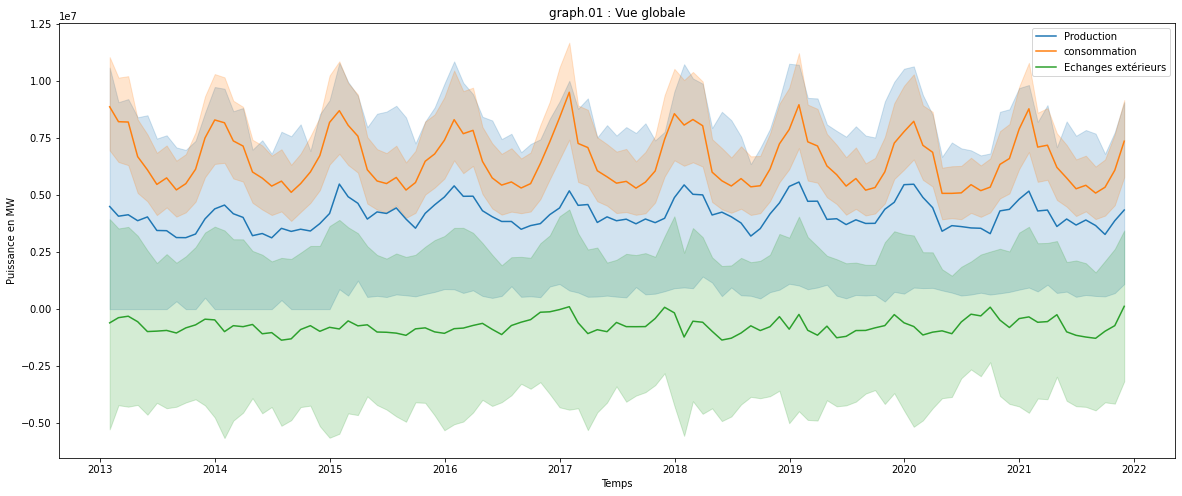

In [153]:
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111)
sns.lineplot(x = 'Date_Heure', y = 'prod_totale_nette', data = df_mois, ax = ax, label='Production')
sns.lineplot(x = 'Date_Heure', y = 'conso_inter', data = df_mois, ax = ax, label='consommation')
sns.lineplot(x = 'Date_Heure', y = 'echanges_ext', data = df_mois, ax = ax, label='Echanges extérieurs')
plt.xlabel('Temps')
plt.ylabel('Puissance en MW')
plt.title('graph.01 : Vue globale');

**Observations graph01 :**
* La situation semble globalement stable sur les 9 années sur lesquelles portent le dataset
* La consommation présentes les variations annuelles les plus fortes, compensées à la fois par la production et les échanges extérieures
* La production présente un très fort écart-type par rapport à la consommation (voir graphique 02 ci-dessous)

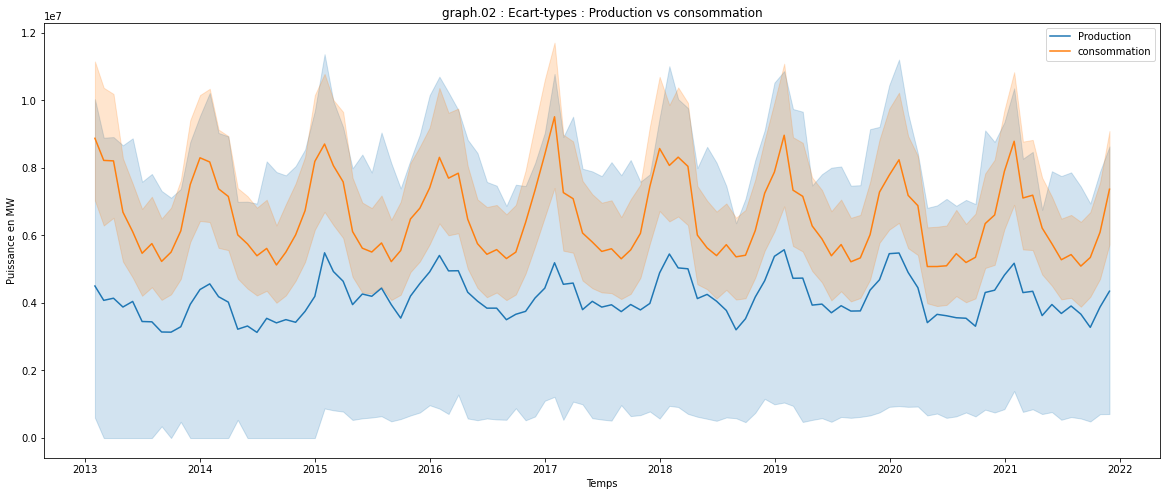

In [154]:
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111)
sns.lineplot(x = 'Date_Heure', y = 'prod_totale_nette', data = df_mois, ax = ax, label='Production')
sns.lineplot(x = 'Date_Heure', y = 'conso_inter', data = df_mois, ax = ax, label='consommation')
plt.xlabel('Temps')
plt.ylabel('Puissance en MW')
plt.title('graph.02 : Ecart-types : Production vs consommation');

<Figure size 1440x576 with 0 Axes>

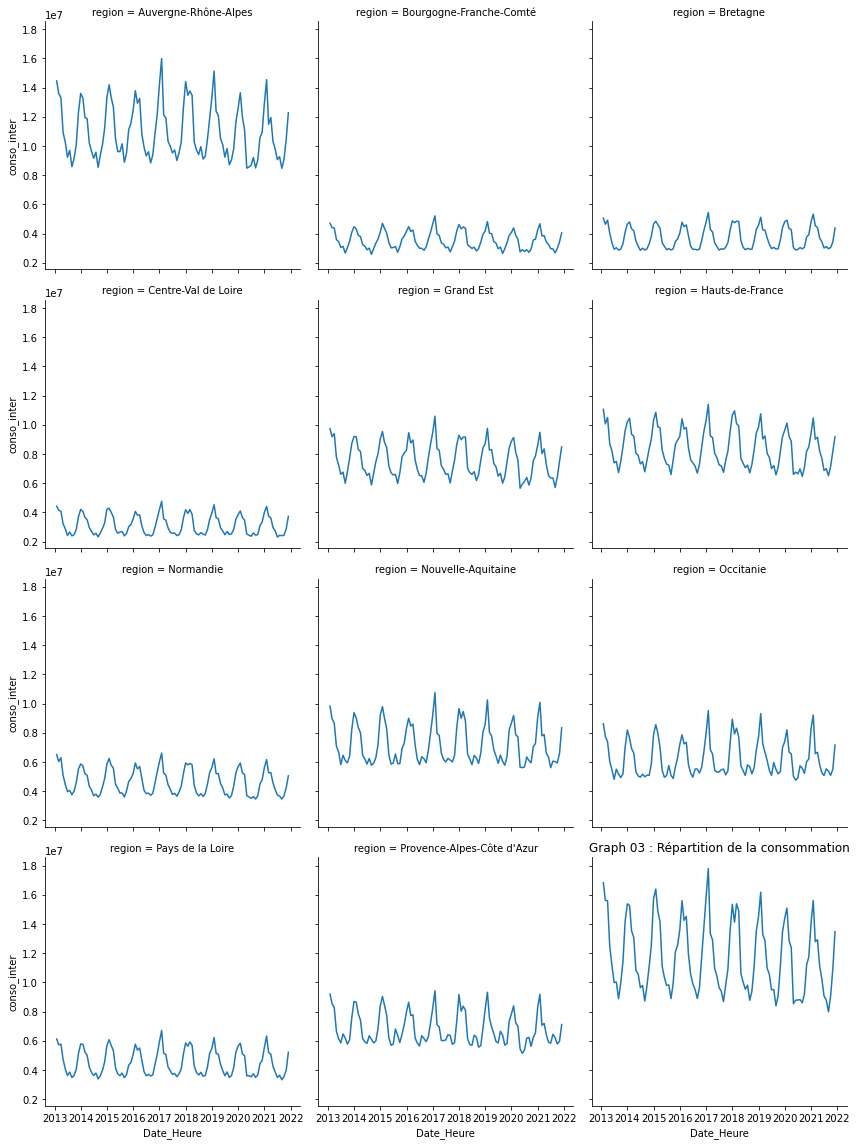

In [162]:
fig = plt.figure(figsize = (20, 8))
sns.relplot(x='Date_Heure', y='conso_inter',data=df_mois,  col='region', kind='line', height=4, col_wrap=3 );
plt.title('Graph 03 : Répartition de la consommation');

**Observation :** comme on peut s'y attendre, toutes les régions consomment, mais à des niveaux différents.
On peut supposer que ces différences de consommations sont peut être très corrélées à la population, l'activité économique et la métérologie locale.

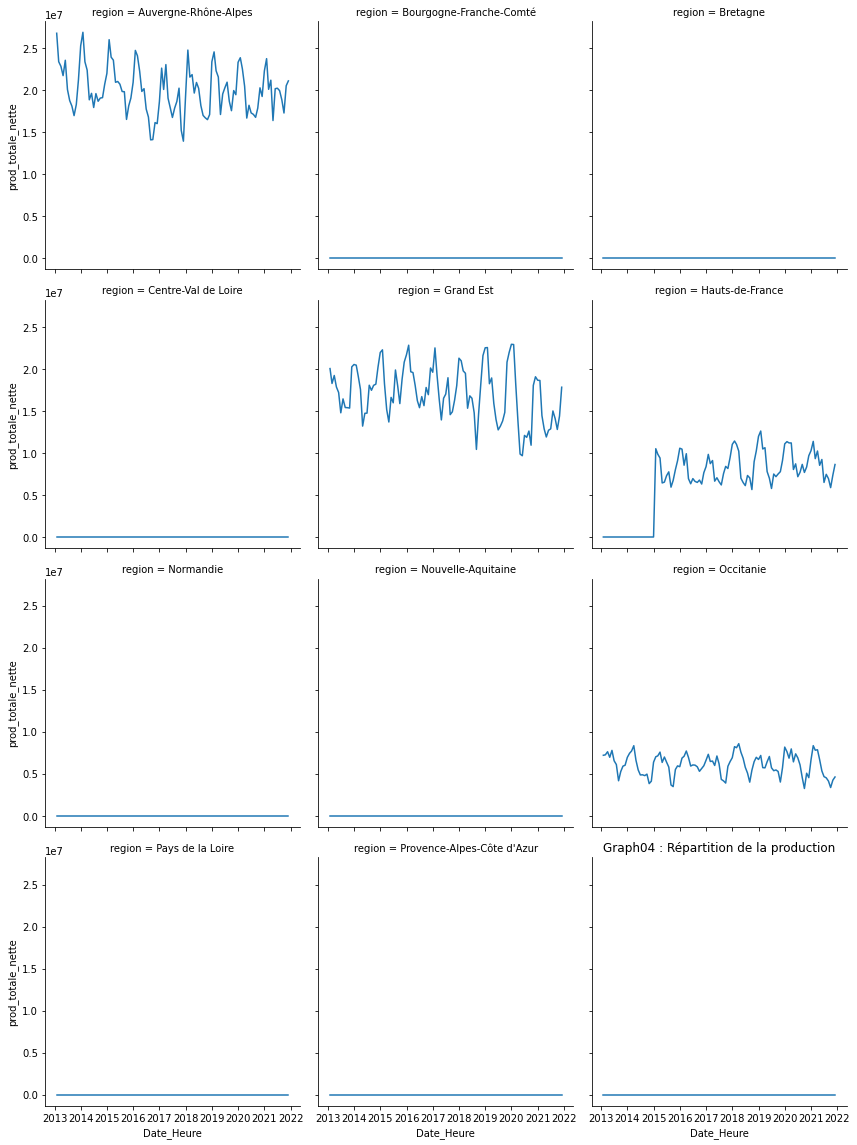

In [159]:
sns.relplot(x='Date_Heure', y='prod_totale_nette',data=df_mois,  col='region', kind='line', height=4, col_wrap=3 )
plt.title('Graph04 : Répartition de la production');

**Observation :** : seules 4 régions sur les 12 sont productrices, ce qui est très inégale

# Analyse de la saisonnalité